#![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)

# **Linear Regression**
#### This lab covers a common supervised learning pipeline, using a subset of the [Million Song Dataset](http://labrosa.ee.columbia.edu/millionsong/) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD). Our goal is to train some models to predict the release year or time period of a song given a set of audio features.

#### The raw data is currently stored in text file.  We will start by storing this raw data in as an RDD, with each element of the RDD representing a data point as a comma-delimited string. Each string starts with the label (a year) followed by numerical audio features.

In [1]:
import os
# export PYSPARK_PYTHON=/usr/bin/python3
# export PYSPARK_DRIVER_PYTHON=ipython3
# export PYSPARK_DRIVER_PYTHON_OPTS="notebook"
# os.environ["PYSPARK_DRIVER_PYTHON"] = "/home/dmitriy/.local/lib/python3.6/site-packages"
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3.6"
# os.environ["PYSPARK_DRIVER_PYTHON_OPTS"]="notebook"
# os.environ["SPARK_HOME"] = "/usr/local/spark/spark-2.4.0-bin-hadoop2.7"

In [2]:
from pyspark import SparkContext
sc = SparkContext("local", "First App")

In [26]:
# TEST
import sys
sys.path.append("/usr/local/lib/python2.7/site-packages")

import hashlib
hashed = lambda x: hashlib.sha1(str(x).encode('utf-8')).hexdigest()

# load testing library
# from test_helper import Test
import os.path
%matplotlib inline

numPartitions = 2
rawData = sc.textFile('millionsong.txt', numPartitions, use_unicode=False).map(lambda x: x.decode("utf-8"))
rawData.take(3)

['2001.0,0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817',
 '2001.0,0.854411946129,0.604124786151,0.593634078776,0.495885413963,0.266307830936,0.261472105188,0.506387076327,0.464453565511,0.665798573683,0.542968988766,0.58044428577,0.445219373624',
 '2001.0,0.908982970575,0.632063159227,0.557428975183,0.498263761394,0.276396052336,0.312809861625,0.448530069406,0.448674249968,0.649791323916,0.489868662682,0.591908113534,0.4500023818']

### EXERCISE 1
#### ** Check the data using `LabeledPoint` **
#### In MLlib, labeled training instances are stored using the [LabeledPoint](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LabeledPoint) object.  Write the parsePoint function that takes as input a raw data point, parses it using Python's [unicode.split](https://docs.python.org/2/library/string.html#string.split) method, and returns a `LabeledPoint`.  Use this function to parse samplePoints by applying it to rawData.  Then print out the features and label for the first training point, using the `LabeledPoint.features` and `LabeledPoint.label` attributes. Finally, calculate the number features for this dataset.
#### Note that `split()` can be called directly on a `unicode` or `str` object.  For example, `u'split,me'.split(',')` returns `[u'split', u'me']`.

In [27]:
from pyspark.mllib.regression import LabeledPoint
import numpy as np

# Here is a sample raw data point:
# '2001.0,0.884,0.610,0.600,0.474,0.247,0.357,0.344,0.33,0.600,0.425,0.60,0.419'
# In this raw data point, 2001.0 is the label, and the remaining values are features

In [28]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.mllib.regression import LabeledPoint


def parsePoint(line):
    """Converts a comma separated unicode string into a `LabeledPoint`.

    Args:
        line (unicode): Comma separated unicode string where the first element is the label and the
            remaining elements are features.

    Returns:
        LabeledPoint: The line is converted into a `LabeledPoint`, which consists of a label and
            features.
    """
    
    feats = line.split(',')
    print(feats)
    
    return LabeledPoint(feats[0], feats[1:])

parsedSamplePoints = rawData.map(parsePoint)

firstPointFeatures = parsedSamplePoints.first().features

firstPointLabel = parsedSamplePoints.first().label
print (firstPointFeatures, firstPointLabel)

d = len(firstPointFeatures)
print (d)

[0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817] 2001.0
12


In [19]:
# TEST
Test.assertEqualsHashed(d, '7b52009b64fd0a2a49e6d8a939753077792b0554', 'incorrect number of features', 'Test 1 success')
Test.assertEqualsHashed(firstPointLabel, 'adba49c03474bed805297a6455464fb0604db4d3', 'incorrect label for firstPointLabel', 'Test 2 success')
expectedX0 = [0.8841,0.6105,0.6005,0.4747,0.2472,0.3573,0.3441,0.3396,0.6009,0.4257,0.6049,0.4192]
Test.assertEqualsHashed((firstPointFeatures-expectedX0), '363289b928767d708220b62d1313f44725a305e9', 
                        'incorrect features for firstPointFeatures', 'Test 3 success')
Test.assertEqualsHashed(d, 'ac3478d69a3c81fa62e60f5c3696165a4e5e6ac4', 'incorrect number of Sample points', 'Test 4 success')

NameError: name 'Test' is not defined

#### **Visualization of Features**
#### First we will load and setup the visualization library.  Then we will look at the raw features for 50 data points by generating a heatmap that visualizes each feature on a grey-scale and shows the variation of each feature across the 50 sample data points.  The features are all between 0 and 1, with values closer to 1 represented via darker shades of grey.

['2001.0', '0.884123733793', '0.610454259079', '0.600498416968', '0.474669212493', '0.247232680947', '0.357306088914', '0.344136412234', '0.339641227335', '0.600858840135', '0.425704689024', '0.60491501652', '0.419193351817']
['2001.0', '0.854411946129', '0.604124786151', '0.593634078776', '0.495885413963', '0.266307830936', '0.261472105188', '0.506387076327', '0.464453565511', '0.665798573683', '0.542968988766', '0.58044428577', '0.445219373624']
['2001.0', '0.908982970575', '0.632063159227', '0.557428975183', '0.498263761394', '0.276396052336', '0.312809861625', '0.448530069406', '0.448674249968', '0.649791323916', '0.489868662682', '0.591908113534', '0.4500023818']
['2001.0', '0.842525219898', '0.561826888508', '0.508715259692', '0.443531142139', '0.296733836002', '0.250213568176', '0.488540873206', '0.360508747659', '0.575435243185', '0.361005878554', '0.678378718617', '0.409036786173']
['2001.0', '0.909303285534', '0.653607720915', '0.585580794716', '0.473250503005', '0.2514170118

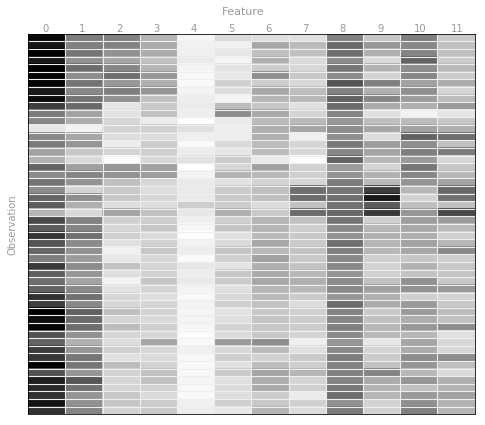

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sampleMorePoints = rawData.take(50)
# You can uncomment the line below to see randomly selected features.  These will be randomly
# selected each time you run the cell.  Note that you should run this cell with the line commented
# out when answering the lab quiz questions.
# sampleMorePoints = rawData.takeSample(False, 50)

parsedSampleMorePoints = map(parsePoint, sampleMorePoints)
dataValues = map(lambda lp: lp.features.toArray(), parsedSampleMorePoints)

def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot
fig, ax = preparePlot(np.arange(.5, 11, 1), np.arange(.5, 49, 1), figsize=(8,7), hideLabels=True,
                      gridColor='#eeeeee', gridWidth=1.1)
image = plt.imshow(list(dataValues),interpolation='nearest', aspect='auto', cmap=cm.Greys)
for x, y, s in zip(np.arange(-.125, 12, 1), np.repeat(-.75, 12), [str(x) for x in range(12)]):
    plt.text(x, y, s, color='#999999', size='10')
plt.text(4.7, -3, 'Feature', color='#999999', size='11'), ax.set_ylabel('Observation')
pass

### EXERCISE 2
#### **Find the range ** and ** Shift labels **
#### Now let's examine the labels to find the range of song years.  To do this, first parse each element of the `rawData` RDD, and then find the smallest and largest labels.

In [30]:
# TODO: Replace <FILL IN> with appropriate code
parsedDataInit = rawData.map(lambda x: parsePoint(x))
print(parsedDataInit.take(1))
onlyLabels = parsedDataInit.map(lambda x: x.label)
minYear = onlyLabels.min()
maxYear = onlyLabels.max()

print (maxYear, minYear)

[LabeledPoint(2001.0, [0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817])]
2011.0 1922.0


In [31]:
DataInit=(len(parsedDataInit.take(1)[0].features),hashed(parsedDataInit.map(lambda lp: lp.features[2]).sum()))
yearRange = maxYear - minYear

In [20]:
# TEST Find the range
Test.assertEqualsHashed(DataInit, '7eeb056f9e35096daaaa6a8b814296693435242f', 'unexpected number of features in sample point', 'Test 5 success')
Test.assertEqualsHashed(yearRange, '7ba8ed7dbc6518d461534ab671348bcbbeff6b42', 'incorrect label for firstPointLabel', 'Test 6 success')

1 test passed. Test 5 success
1 test passed. Test 6 success


#### As we just saw, the labels are years in the 1900s and 2000s.  In learning problems, it is often natural to shift labels such that they start from zero.  Starting with `parsedDataInit`, create a new RDD consisting of `LabeledPoint` objects in which the labels are shifted such that smallest label equals zero.

In [32]:
# TODO: Replace <FILL IN> with appropriate code
parsedData = parsedDataInit.map(lambda lp:LabeledPoint(lp.label - minYear, lp.features))

# Should be a LabeledPoint
print (type(parsedData.take(1)[0]))
# View the first point
print ('\n{0}'.format(parsedData.take(1)))

<class 'pyspark.mllib.regression.LabeledPoint'>

[LabeledPoint(79.0, [0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817])]


In [33]:
oldSampleFeatures = parsedDataInit.take(1)[0].features
newSampleFeatures = parsedData.take(1)[0].features
DiffSampleFeatures=oldSampleFeatures-newSampleFeatures

minYearNew = parsedData.map(lambda lp: lp.label).min()
maxYearNew = parsedData.map(lambda lp: lp.label).max()
yearNewRange=maxYearNew-minYearNew

sumFeatTwo = parsedData.map(lambda lp: lp.features[2]).sum()
print (DiffSampleFeatures)
print (yearNewRange)

[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
89.0


In [23]:
# TEST Shift labels
Test.assertEqualsHashed(DiffSampleFeatures, 'ec2e1dc7b5acfefe5ddd5683a5770daa571fa7af', 'new features do not match old features', 'Test 7 success')
Test.assertEqualsHashed(yearNewRange, '7ba8ed7dbc6518d461534ab671348bcbbeff6b42', 'incorrect label for firstPointLabel', 'Test 8 success')

1 test passed. Test 7 success
1 test passed. Test 8 success


### EXERCISE 3
#### **Training, validation, and test sets **
#### We're almost done parsing our first dataset, and our final task involves split it into training, validation and test sets. Use the [randomSplit method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.randomSplit) with the specified weights and seed to create RDDs storing each of these datasets. Next, cache each of these RDDs, as we will be accessing them multiple times in the remainder of this lab. Finally, compute the size of each dataset and verify that the sum of their sizes equals the 6724.

In [34]:
# TODO: Replace <FILL IN> with appropriate code

weights = [.8, .1, .1]
seed = 42

parsedTrainData, parsedValData, parsedTestData = parsedData.randomSplit(weights, seed=seed)
parsedTrainData.cache()
parsedValData.cache()
parsedTestData.cache()
nTrain = parsedTrainData.count()
nVal = parsedValData.count()
nTest = parsedTestData.count()

print (nTrain, nVal, nTest, nTrain + nVal + nTest)
print (parsedData.count())

5359 678 687 6724
6724


In [35]:
sumFeatTwo = (parsedTrainData
              .map(lambda lp: lp.features[2])
              .sum())
sumFeatThree = (parsedValData
                .map(lambda lp: lp.features[3])
                .reduce(lambda x, y: x + y))
sumFeatFour = (parsedTestData
               .map(lambda lp: lp.features[4])
               .reduce(lambda x, y: x + y))
listSums=[sumFeatTwo, sumFeatThree, sumFeatFour]
sumWhole=nTrain + nVal + nTest
print (listSums)
print (sumWhole)

[2515.7004339787263, 297.32279709468696, 187.38303646523198]
6724


In [28]:
Test.assertEqualsHashed(sumWhole, '2cfc84ed2f2c864291ee146be109eb4a10e32a35', 'unexpected Train, Val, Test data set size', 'Test 9 success')
Test.assertEqualsHashed(listSums, '6cbf9887b7256a2d4bd71f4f203ed18f2662ecd4', 'parsed Train, Val, Test data has unexpected values', 'Test 10 success')
Test.assertEqualsHashed(parsedData, '0019ff765b7fae3ae321cef02d908d445ac66006', 'parsedDatas have wrong number of partitions', 'Test 11 success')
Test.assertEqualsHashed(len(parsedTrainData.take(1)[0].features), '7b52009b64fd0a2a49e6d8a939753077792b0554', 
                        'parsedTrainData havs wrong number of features', 'Test 12 success')

1 test passed. Test 9 success
1 test passed. Test 10 success
1 test failed. parsedDatas have wrong number of partitions
1 test passed. Test 12 success


#### Now we are ready to traine the Linear Regression model
### EXERCISE 4
#### **MLlib's [LinearRegressionWithSGD](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionWithSGD)**
#### First use LinearRegressionWithSGD to train a model with L2 regularization and with an intercept.  This method returns a [LinearRegressionModel](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel).  Next, use the model's [weights](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.weights) and [intercept](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.intercept) attributes to print out the model's parameters.

In [36]:
from pyspark.mllib.regression import LinearRegressionWithSGD
# Values to use when training the linear regression model
numIters = 500  # iterations
alpha = 1.0  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

In [37]:
# TODO: Replace <FILL IN> with appropriate code
firstModel = LinearRegressionWithSGD.train(parsedTrainData,iterations=numIters,step=alpha,miniBatchFraction=miniBatchFrac,
                                           regParam=reg,regType=regType,intercept=useIntercept)

# weightsLR1 stores the model weights; interceptLR1 stores the model intercept

weightsLR1 = firstModel.weights
interceptLR1 = firstModel.intercept
print (weightsLR1, interceptLR1)

[15.969401024573182,13.989724417215305,0.6693493837729424,6.246184029892073,4.009321795030261,-2.3017666313103415,10.47880542195774,3.0638514538477035,7.14414111075348,4.498268195264368,7.8770256506893785,3.0073214661297207] 13.332056210482524


In [31]:
# TEST LinearRegressionWithSGD
expectedIntercept = 13.3335907631
expectedWeights = [16.682292427, 14.7439059559, -0.0935105608897, 6.22080088829, 4.01454261926, -3.30214858535,
                   11.0403027232, 2.67190962854, 7.18925791279, 4.46093254586, 8.14950409475, 2.75135810882]
Test.assertEqualsHashed(abs(interceptLR1-expectedIntercept)<1, '88b33e4e12f75ac8bf792aebde41f1a090f3a612', 
                        'incorrect value for interceptLR1', 'Test 13 success')
Test.assertEqualsHashed(abs(weightsLR1[0]-expectedWeights[0])<1, '88b33e4e12f75ac8bf792aebde41f1a090f3a612', 
                        'incorrect value for weightsLR1', 'Test 14 success')

1 test passed. Test 13 success
1 test passed. Test 14 success


#### Now use the [LinearRegressionModel.predict()](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.predict) method to make a prediction on a sample point.  Pass the `features` from a `LabeledPoint` into the `predict()` method.

In [38]:
# TODO: Replace <FILL IN> with appropriate code
samplePoint = parsedTrainData.take(1)[0]

samplePrediction = firstModel.predict(samplePoint.features)
print (samplePrediction)

56.40656741038491


In [37]:
# TEST Predict
Test.assertEqualsHashed(abs(samplePrediction - 56.8013380112)<1, '88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'incorrect value for samplePrediction', 'Test 15 success')

1 test passed. Test 15 success


#### We naturally would like to see how well this performs.  We will use root mean squared error ([RMSE](http://en.wikipedia.org/wiki/Root-mean-square_deviation)) for evaluation purposes.  Implement a function to compute RMSE given an RDD of (label, prediction) tuples, and test out this function on an example.

In [39]:
# TODO: Replace <FILL IN> with appropriate code
def squaredError(label, prediction):
    """Calculates the the squared error for a single prediction.

    Args:
        label (float): The correct value for this observation.
        prediction (float): The predicted value for this observation.

    Returns:
        float: The difference between the `label` and `prediction` squared.
    """
    
    return (prediction - label)**2

def calcRMSE(labelsAndPreds):
    """Calculates the root mean squared error for an `RDD` of (label, prediction) tuples.

    Args:
        labelsAndPred (RDD of (float, float)): An `RDD` consisting of (label, prediction) tuples.

    Returns:
        float: The square root of the mean of the squared errors.
    """
    
    return np.sqrt(float(labelsAndPreds.map(lambda x: squaredError(*x)).mean()))

labelsAndPreds = sc.parallelize([(3., 1.), (1., 2.), (2., 2.)])
# RMSE = sqrt[((3-1)^2 + (1-2)^2 + (2-2)^2) / 3] = 1.291
exampleRMSE = calcRMSE(labelsAndPreds)
print (exampleRMSE)

1.2909944487358056


In [45]:
# TEST Root mean squared error
Test.assertEqualsHashed(squaredError(3, 1), '1b6453892473a467d07372d45eb05abc2031647a', 'incorrect definition of squaredError', 'Test 16 success')
Test.assertEqualsHashed(exampleRMSE, '4b322e37f07576b9230316f90b84285b5d096941', 'incorrect value for exampleRMSE', 'Test 17 success')

1 test passed. Test 16 success
1 test passed. Test 17 success


#### Next evaluate the accuracy of this model on the validation set.  Use the `predict()` method to create a `labelsAndPreds` RDD, and then use the `calcRMSE()` function.

In [41]:
# TODO: Replace <FILL IN> with appropriate code
labelsAndPreds = parsedValData.map(lambda x:(x.label,firstModel.predict(x.features)))
rmseValLR1 = calcRMSE(labelsAndPreds)

print ('Validation RMSE: LR1 = {0:.11f}'.format(rmseValLR1))

Validation RMSE: LR1 = 19.02482258855


#### We're already outperforming the baseline on the validation set by almost 2 years on average, but let's see if we can do better. Perform grid search to find a good regularization parameter.  Try `regParam` values `1e-10`, `1e-5`, and `1`.

In [42]:
# TODO: Replace <FILL IN> with appropriate code
bestRMSE = rmseValLR1
bestRegParam = reg
bestModel = firstModel
regParam = ['1e-10', '1e-5', '1']

numIters = 500
alpha = 1.0
miniBatchFrac = 1.0
for reg in regParam:
    model = LinearRegressionWithSGD.train(parsedTrainData, numIters, alpha,
                                          miniBatchFrac, regParam=reg,
                                          regType='l2', intercept=True)
    labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
    rmseValGrid = calcRMSE(labelsAndPreds)
    print (rmseValGrid)

    if rmseValGrid < bestRMSE:
        bestRMSE = rmseValGrid
        bestRegParam = reg
        bestModel = model
rmseValLRGrid = bestRMSE



16.68135425161156
16.681681606225485
23.409502589967452


In [49]:
# TEST Grid search
Test.assertEqualsHashed((abs(rmseValLRGrid-17.017170071631259)<1,abs(rmseValLR1-19.691247341628721)<1), '6d968538694d0ff0b4e434242f8929869ce29fba', 
                        'incorrect values for rmseValLRGrid and rmseValLR1', 'Test 18 success')

1 test passed. Test 18 success


#### Sometimes enough predict the time period. Let's traine some enouther model for period time prediction.

### EVERCISE 5
#### **MLlib's [DecisionTree](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html?highlight=pyspark.mllib.tree#pyspark.mllib.tree.DecisionTree)** and **[RandomForest](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html?highlight=pyspark.mllib.tree#pyspark.mllib.tree.RandomForest)** Classifier
#### First we need replace year lable for time period label

In [43]:
def period_labels(in_line):
    if minYear <= in_line.label < 1940.0:
        in_line.label = 0.0
    elif 1940.0 <= in_line.label < 1960.0:
        in_line.label = 1.0
    elif 1960.0 <= in_line.label < 1980.0:
        in_line.label = 2.0
    elif 1980.0 <= in_line.label < 2000.0:
        in_line.label = 3.0
    elif 2000.0 <= in_line.label <= maxYear:
        in_line.label = 4.0
    return in_line

#### Next create a new dataset with **period_labels()** function. Try to get it from rawData.

In [44]:
# TODO: Replace <FILL IN> with appropriate code
parsedData2 = rawData.map(lambda x: period_labels(parsePoint(x)))

In [67]:
Test.assertEqualsHashed(parsedData2.map(lambda lp: lp.label).sum(), '0a64c49801579d52880487ca045606a2a37374a8', 
                        'Wrong period labels in Data', 'Test 19 success')

1 test passed. Test 19 success


#### And split randomly  **parsedData2** to **parsedTrainData2** and **parsedTestData2** with **weights**

In [45]:
weights = [.7, .3]
# TODO: Replace <FILL IN> with appropriate code
(parsedTrainData2, parsedTestData2) = parsedData2.randomSplit(weights, seed=seed)

In [71]:
Test.assertEqualsHashed(parsedTrainData2.map(lambda lp: lp.label).sum(), '321d01504f5827edab56fde6fb493762f5d37521', 
                        'Incorect splitting', 'Test 20 success')
Test.assertEqualsHashed(parsedTestData2.map(lambda lp: lp.label).sum(), '3ceee74eedb864ff868f9f0e67464a8f7a3abd05', 
                        'Incorect splitting', 'Test 21 success')
Test.assertEqualsHashed(np.allclose(parsedData2.map(lambda lp: lp.label).sum(), 
                                    (parsedTrainData2.map(lambda lp: lp.label).sum()+parsedTestData2.map(lambda lp: lp.label).sum())), 
                                     '3ceee74eedb864ff868f9f0e67464a8f7a3abd05', 'Incorect splitting', 'Test 22 success')

1 test passed. Test 20 success
1 test passed. Test 21 success
1 test failed. Incorect splitting


#### Train DecisionTree model and predict it

In [88]:
def for_filter(v,p):
    return v==p
list1 = [1,2,3,4,5]
list1 = [for_filter(list1[i],list1[i+1]) for i in range(len(list1)-1)]
print(list1)
list1 = [lambda i: list1[i]==list1[i+1] for i in range(len(list1)-1)]
print(list1)

[False, False, False, False]
[<function <listcomp>.<lambda> at 0x7f11501481e0>, <function <listcomp>.<lambda> at 0x7f11501482f0>, <function <listcomp>.<lambda> at 0x7f1150148158>]


In [74]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.mllib.tree import DecisionTree


model = DecisionTree.trainClassifier(parsedTrainData2, numClasses=6, categoricalFeaturesInfo={},
                                         impurity='gini', maxDepth=20, maxBins=20)
    
predictions = model.predict(parsedTestData2.map(lambda x: x.features))
labelsAndPredictions_DecisionTree = parsedTestData2.map(lambda lp: lp.label).zip(predictions)
# Calculate accuracy our test prediction for model DecisionTree
test_acc_DecisionTree = labelsAndPredictions_DecisionTree.filter(
    lambda x: x[1]==x[0]).count()/float(parsedTestData2.count())

In [73]:
Test.assertEqualsHashed(test_acc_DecisionTree>=0.41,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong DecisionTree model prediction', 
                        'Test 23 success')

1 test passed. Test 23 success


#### Train RandomForest model and predict it

In [78]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.mllib.tree import RandomForest

model = RandomForest.trainClassifier(parsedTrainData2, numClasses=6, categoricalFeaturesInfo={},
                                     numTrees=3, featureSubsetStrategy="auto",
                                     impurity='gini', maxDepth=4, maxBins=32)

predictions = model.predict(parsedTestData2.map(lambda x: x.features))

labelsAndPredictions_RandomForest = parsedTestData2.map(lambda lp: lp.label).zip(predictions)

test_acc_RandomForest = labelsAndPredictions_RandomForest.filter(
    lambda x: x[1]==x[0]).count()/float(parsedTestData2.count())

In [76]:
Test.assertEqualsHashed(test_acc_RandomForest>=0.4,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong RandomForest model prediction', 
                        'Test 24 success')

1 test passed. Test 24 success


#### Comparison accuracy

In [79]:
print('Test Accuracy = ' + str(test_acc_DecisionTree))
print('Test Accuracy = ' + str(test_acc_RandomForest))

Test Accuracy = 0.4425825529817644
Test Accuracy = 0.4051256776737309


### EVERCISE 6
#### **MLlib's [LogisticRegressionWithSGD](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html?highlight=logisticregressionwithsgd#pyspark.mllib.classification.LogisticRegressionWithSGD)** and **[SVMWithSGD](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html?highlight=svmwithsgd#pyspark.mllib.classification.SVMWithSGD)**
#### Create **period_binary()** function to get two labels for each millennium (1.0 for current millennium, and 0.0 - for previous). Get **parsedData3**, **parsedTrainData3**, **parsedTestData3** with this function and weights

In [80]:
# TODO: Replace <FILL IN> with appropriate code
def period_binary(in_line):
    if in_line.label < 2000.0:
        in_line.label = 0.0
    else:
        in_line.label = 1.0
    return in_line

weights = [.7, .3]

parsedData3 = rawData.map(lambda x: period_binary(parsePoint(x)))
(parsedTrainData3, parsedTestData3) = parsedData3.randomSplit(weights, seed=seed)

In [98]:
Test.assertEqualsHashed(parsedData3.map(lambda lp: lp.label).sum(),'2f96c1c8410ef66dfd763f0810550308d2879777', 
                        'Wrong period labels in Data', 'Test 25 success')
Test.assertEqualsHashed((parsedTrainData3.map(lambda lp: lp.label).sum()+parsedTestData3.map(lambda lp: lp.label).sum()),
                        '2f96c1c8410ef66dfd763f0810550308d2879777', 'Incorect splitting', 'Test 26 success')

1 test passed. Test 25 success
1 test passed. Test 26 success


#### Traine and predict LogisticRegressionWithSGD

In [81]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.mllib.classification import LogisticRegressionWithSGD

model = LogisticRegressionWithSGD.train(parsedTrainData3, numIters, alpha,
                                        miniBatchFrac, regParam=reg,
                                        regType='l2', intercept=True)

predictions = model.predict(parsedTestData3.map(lambda x: x.features))

labelsAndPreds_LogisticRegression = parsedTestData3.map(lambda lp: lp.label).zip(predictions)

In [110]:
a = labelsAndPreds_LogisticRegression.filter(lambda x: x[0]==x[1]).count() / float(parsedTestData3.count())
Test.assertEqualsHashed(a>=0.82,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong LogisticRegression model prediction', 
                        'Test 27 success')

1 test passed. Test 27 success


#### Calculate test error (opposite to training accuracy)

In [82]:
# TODO: Replace <FILL IN> with appropriate code
trainErr_LogisticRegression = labelsAndPreds_LogisticRegression.filter(
                                lambda lp: lp[0] != lp[1]).count() / float(parsedData3.count())
print("Test Error = " + str(trainErr_LogisticRegression))

Test Error = 0.049226650803093394


#### Traine and predict SVMWithSGD. Then calculate test error

In [83]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.mllib.classification import SVMWithSGD

model = SVMWithSGD.train(parsedTrainData3, numIters, alpha,
                        miniBatchFrac, reg,
                        regType='l2', intercept=True)

predictions = model.predict(parsedTestData3.map(lambda x: x.features))

labelsAndPreds_SVMWithSGD = parsedTestData3.map(lambda lp: lp.label).zip(predictions)

In [113]:
a = labelsAndPreds_SVMWithSGD.filter(lambda x: x[0]==x[1]).count() / float(parsedTestData3.count())
Test.assertEqualsHashed(a>=0.82,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong SVMWithSGD model prediction', 
                        'Test 28 success')

1 test passed. Test 28 success


In [84]:
trainErr_SVMWithSGD = labelsAndPreds_SVMWithSGD.filter(
                                lambda lp: lp[0] != lp[1]).count() / float(parsedData3.count())
# Comparison test error LogisticRegressionWithSGD and SVMWithSGD
print("Test Error = " + str(trainErr_LogisticRegression))
print("Test Error = " + str(trainErr_SVMWithSGD))

Test Error = 0.049226650803093394
Test Error = 0.049226650803093394


In [115]:
Test.assertEqualsHashed(trainErr_LogisticRegression<=0.18,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong LogisticRegression err calculation', 
                        'Test 29 success')
Test.assertEqualsHashed(trainErr_SVMWithSGD<=0.18,'88b33e4e12f75ac8bf792aebde41f1a090f3a612', 'Wrong SVMWithSGD err calculation', 
                        'Test 30 success')

1 test passed. Test 29 success
1 test passed. Test 30 success


<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>